In [251]:
####################### DATA WRANGLING AND FEATURE ANALYSIS #####################################
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

#Understanding the data
dictionary = pd.read_excel('Data/neis-data-dictionary_terms.xlsx')
main       = pd.read_excel("Data/neisdatagovhack_Main.xlsx")
dict_df = pd.DataFrame.from_dict(dictionary, orient='columns', dtype=None)
main_df = pd.DataFrame.from_dict(main, orient='columns', dtype=None)
print(dict_df)
print(main_df.info())
print(main_df.describe())

         Variable name                               Variable description  \
0          business_id                 Unique identifier for the business   
1           start_date  The date the NEIS participant entered the NEIS...   
2             end_date  The date the NEIS participant exited the NEIS ...   
3            neis_type  The employment services program in which the b...   
4          exit_reason  The reason for which the NEIS participant exit...   
5           successful  Indicates whether the NEIS participant success...   
6          anzsic_code                 The industry code for the business   
7        industry_type       The broad industry category for the business   
8                state             The state or territory of the business   
9                metro  Indicates whether the location of the business...   
10           age_group                  Age group of the NEIS participant   
11           gender_cd              Sex indicator of the NEIS participant   

        business_id   anzsic_code         metro      sv_month       sv_year  \
count  53646.000000  53596.000000  53646.000000  11147.000000  11147.000000   
mean   26827.169258   7423.195780      0.058308      6.606262   2012.755898   
std    15488.324811   2428.965571      0.234327      3.435323      1.818195   
min        1.000000    100.000000      0.000000      1.000000   2009.000000   
25%    13414.250000   5259.000000      0.000000      4.000000   2011.000000   
50%    26827.500000   7869.000000      0.000000      6.000000   2012.000000   
75%    40239.750000   9525.000000      0.000000     10.000000   2014.000000   
max    53654.000000   9901.000000      1.000000     12.000000   2017.000000   

       sv_hours_work  sv_staff_lt35h  sv_staff_gt35h  sv_end_train  \
count    8102.000000     5803.000000     5296.000000   3049.000000   
mean       35.280449        0.558849        0.405778      1.296491   
std        21.909007        2.007426        2.342488      0.598547   
min     

In [269]:
# Analyse the information in columns and study the data in it
dict_df.columns = ['var_name','var_descr','var_coding','var_categ','notes']
print(main_df.head())
print(dict_df.head())

   business_id start_date   end_date neis_type  \
0            1 2013-09-26 2014-09-24      NEI4   
1            2 2014-06-05 2015-06-03      NEI4   
2            3 2015-04-09 2016-01-17      NEI4   
3            4 2009-12-24 2010-12-22      NEI4   
4            5 2015-09-10 2016-09-07      NEI5   

                              exit_reason successful  anzsic_code  \
0                  Completed Successfully          Y       7112.0   
1                  Completed Successfully          Y       9529.0   
2  Business not Operating According to BP          N       7866.0   
3                  Completed Successfully          Y       6644.0   
4                  Completed Successfully          Y       7865.0   

           industry_type state  metro        ...        sv_end_profit  \
0          communication    SA      0        ...                  NaN   
1     personal_and_other   VIC      0        ...                  NaN   
2  property_and_business   NSW      0        ...                 

Index(['business_id', 'start_date', 'end_date', 'neis_type', 'exit_reason',
       'successful', 'anzsic_code', 'industry_type', 'state', 'metro',
       'age_group', 'gender_cd', 'indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind', 'neis_allowance_ind', 'surveyed', 'sv_month',
       'sv_year', 'sv_in_operation', 'sv_hours_work', 'sv_staff_lt35h',
       'sv_staff_gt35h', 'sv_end_train', 'sv_end_mentor', 'sv_end_profit',
       'sv_end_dem', 'sv_end_loc', 'sv_end_health', 'sv_end_oth',
       'sv_sat_bus_train', 'sv_sat_mentor', 'sv_tailor_sup', 'sv_sat_overall'],
      dtype='object')
Index(['var_name', 'var_descr', 'var_coding', 'var_categ', 'notes'], dtype='object')
                                             Age                          \
AgeVal                                     15_19 20_24 25_29 30_34 35_39   
industry_type                   successful                                 
accommodation_c

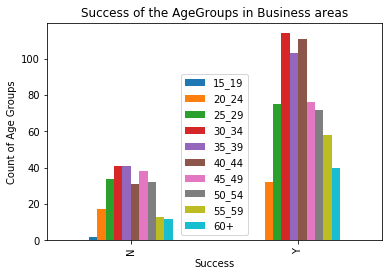

In [253]:
print(main_df.columns)
print(dict_df.columns)

#### Different age groups that are successfull in different industries###########
# Below Pivot tables and plots are helpful in analysing the features.
main_melt = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['age_group'],var_name='Age',value_name='AgeVal')

# Replace N/A values with 0 in the columns of pivot table
main_pivot = main_melt.pivot_table(values=None, index=['industry_type','successful'], columns='AgeVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot)


industries = main_pivot.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot.xs(industry)
    age_group = split["Age"]

# plot a bar chart to check which Age groups are successfull.
age_group.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Count of Age Groups')
plt.title('Success of the AgeGroups in Business areas')
plt.show()

                                           State                            \
StateVal                                     ACT   NSW  NT   QLD   SA  TAS   
industry_type                   successful                                   
accommodation_cafes_restaurants N              3   101   0    42   18   14   
                                Y              4   174   1    75   56   33   
agriculture_forestry_fishing    N              0    82   0    51   11    6   
                                Y              3   202   2   109   40   24   
communication                   N              0    43   0    19    7    0   
                                Y              1    54   0    38   14    1   
construction                    N              8   207   2   159   34   24   
                                Y             15   500   7   408  121   58   
cultural_and_recreational       N             28   616   3   326  146   46   
                                Y             50  1447  17   829

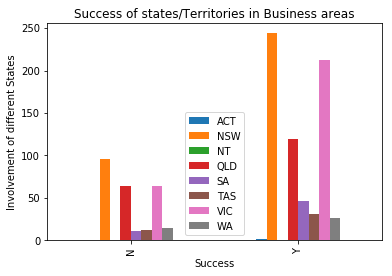

In [254]:
main_melt2 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['state'],var_name='State',value_name='StateVal')
# Replace N/A values with 0 in the columns of pivot table
main_pivot2 = main_melt2.pivot_table(values=None, index=['industry_type','successful'], columns='StateVal', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot2)
industries = main_pivot2.index.get_level_values(0).unique()
for industry in industries:
    split = main_pivot2.xs(industry)
    state = split["State"]

# plot a bar chart to check which States/Territories are getting involved in what businesses and how 
# successful they are..
state.plot(kind="bar").legend(loc='lower center')
plt.xlabel('Success')
plt.ylabel('Involvement of different States')
plt.title('Success of states/Territories in Business areas')
plt.show()

In [270]:
#### Success/Failure in business for various personalities#######
main_melt3 = pd.melt(main_df,id_vars=['industry_type','successful'], value_vars=['indigenous_ind', 'ex_offender_ind',
       'nesb_ind', 'refugee_ind', 'disability_ind', 'homeless_ind',
       'sole_parent_ind'],var_name='Personality',value_name='PersVal')
main_filter3 = main_melt3.query("PersVal == 'Y'")

# Replace N/A values with 0 in the columns of pivot table
main_pivot3 = main_filter3.pivot_table(values=None, index=['industry_type','successful'], columns='Personality', aggfunc='count', fill_value=0, margins=False, dropna=True, margins_name='All')
print(main_pivot3)

                                                  PersVal                  \
Personality                                disability_ind ex_offender_ind   
industry_type                   successful                                  
accommodation_cafes_restaurants N                      65               5   
                                Y                     107               7   
agriculture_forestry_fishing    N                      70               7   
                                Y                     151              26   
communication                   N                      23               4   
                                Y                      42              12   
construction                    N                     199              71   
                                Y                     440             141   
cultural_and_recreational       N                     448              76   
                                Y                     864              81   

69.35028616704771 -0.11192856335359745
slope = 69.35028616704771 Success percentage by Industry types
intercept = -0.11192856335359745 Totals per Industry(in 1000s)


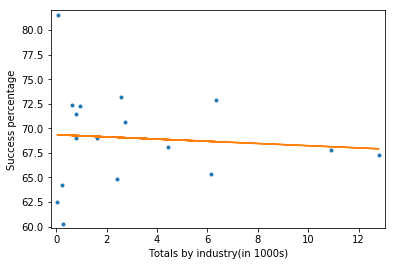

In [271]:
########################################################################################################
# Conduct a linear regression analysis to check how the success rate varies among different industries.
# Industry_type appears to be a strong feature??
########################################################################################################
# Perform a linear regression
import numpy.polynomial.polynomial as poly

def convert_success(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 1
    else: return 0

main_df["success_indicator"] = main_df["successful"].apply(convert_success)
industry_df = main_df.groupby(['industry_type','successful'], as_index=False).agg({"success_indicator": "sum"})


# Find the Success percentage of each industry
industry_y_df = industry_df[industry_df['successful'] == 'Y']
industry_n_df = industry_df[industry_df['successful'] == 'N']
industry_y_df.columns = ['industry_type','successful_y','success_count_y']
industry_n_df.columns = ['industry_type','successful_n','success_count_n']

ind_result = pd.merge(industry_y_df, industry_n_df, on='industry_type')
ind_result['total'] = ind_result.success_count_n + ind_result.success_count_y
ind_result['success_percent'] = (( ind_result.success_count_y / ind_result.total ) * 100)

y_percent = np.array(ind_result.success_percent)
x_total    = (np.array(ind_result.total / 1000))

# Plot the Success percentage per industry by total.
_ = plt.plot(x_total, y_percent, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Totals by industry(in 1000s)')
_ = plt.ylabel('Success percentage')

a,b = coefs = poly.polyfit(x_total, y_percent, 1)
ffit = poly.polyval(x_total, coefs)
plt.plot(x_total, ffit)
print(coefs[0],coefs[1])

# Print the results to the screen
print('slope =', a, 'Success percentage by Industry types')
print('intercept =', b, 'Totals per Industry(in 1000s)')
plt.show()

In [ ]:
# As per the regression plot shown above, 
# 1) There is no correlation between 'industry type' and 'Success'
# 3) It appears that the industry_tye does not influence the success rate. However, the
#    the industry type can be retained as a feature for GROUPING purposes

In [272]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(x_totals,y_success)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
Ind_cov = covariance_matrix[0,1]

# Print the 'Success percentage and Industry Totals' covariance
print('Covariance is:',Ind_cov)

# A negative covariance of '-1.65' shows that there is no dependency between 'Industry type' and 'Being Successful'

[[14.75120937 -1.65108167]
 [-1.65108167 24.89212699]]
Covariance is: -1.6510816722489032


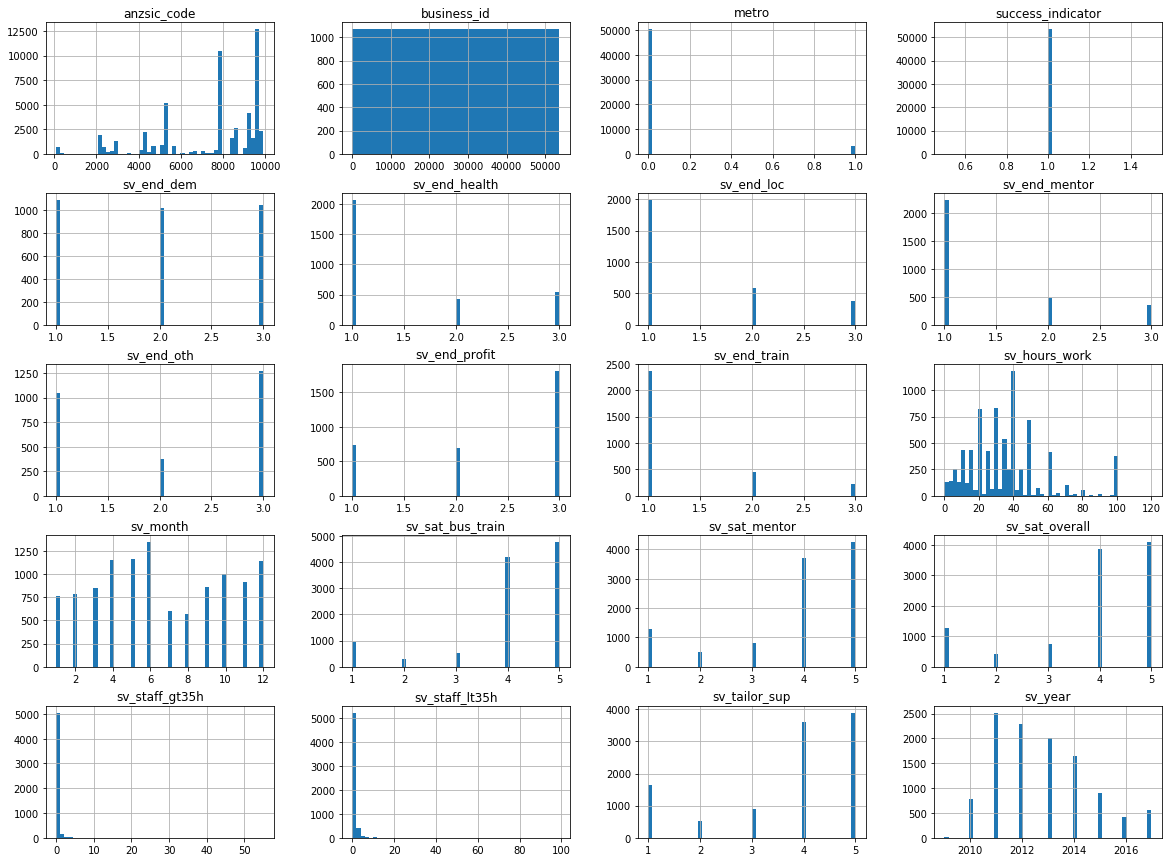

In [273]:
# Analyse and compare the histograms of other 
%matplotlib inline
import matplotlib.pyplot as plt
main_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [263]:
# Converting the states to NUMBERS to find the correlation coefficient
def convert_state(x):
    if "NSW" in x:
        return 11
    elif "QLD" in x:
        return 12
    elif "WA" in x:
        return 13
    elif "SA" in x:
        return 14
    elif "TAS" in x:
        return 15
    elif "VIC" in x:
        return 16
    else: return 0


# Ages of the participants are provided. Therefore, we are converting the Age_groups to ages.
# For instance, if the Age_group is 55_59, then the age of the participant is considered to be 59
# ['40_44' '50_54' '30_34' '55_59' '35_39' '25_29' '60+' '45_49' '20_24'
# '15_19']
def convert_agegrp(x):
    if "15-19" in x:
        return 19
    elif "20-24" in x:
        return 24
    elif "25-29" in x:
        return 29
    elif "30-34" in x:
        return 34
    elif "35-39" in x:
        return 39  
    elif "40-44" in x:
        return 44
    elif "45-49" in x:
        return 49
    elif "50-54" in x:
        return 54  
    elif "55-59" in x:
        return 59
    elif "60+" in x:
        return 60  
    else: return 0


# Representing the gender as NUMBERS i.e. Male: 1 and Female: 0
def convert_gender(x):
    if "M" in x:
        return 1
    elif "F" in x:
        return 0
    else: return 0
    
# Representing the Success_indicators as NUMBERS i.e. SUCCESS - Y: 1 and SUCCESS - N (Failure): 0    
def convert_successful(x):
    if "Y" in x:
        return 1
    elif "N" in x:
        return 1
    else: return 0    

# Some of the columns store text/ Business IDs and they dont make much sense. Therefore, consider numerical columns.
main_model = main_df[['state','metro','age_group','gender_cd','industry_type',
                      'sv_hours_work','sv_month','sv_sat_bus_train',
                      'sv_sat_mentor','sv_sat_overall','neis_allowance_ind','successful']]

# Some of the features in the above dataframe above text/ descriptions and these can be converted to numerical equivalents.
# for Instance, in "gender_cd", male can be represented as 1 and female can be represented as 0   
main_model["success_indicator"] = main_model["successful"].apply(convert_successful)
main_model["state"] = main_model["state"].apply(convert_state)
main_model["age_group"] = main_model["age_group"].apply(convert_agegrp)
main_model["neis_allowance_ind"] = main_model["neis_allowance_ind"].apply(convert_gender) # function for "gender" can be applied here
main_model["gender_cd"] = main_model["gender_cd"].apply(convert_gender)

main_model.describe()

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,state,metro,age_group,gender_cd,sv_hours_work,sv_month,sv_sat_bus_train,sv_sat_mentor,sv_sat_overall,neis_allowance_ind,success_indicator
count,53646.000000,53646.000000,53646.000000,53646.000000,8102.000000,11147.000000,10700.000000,10593.000000,10408.000000,53646.0,53646.0
mean,12.983633,0.058308,2.629460,0.516143,35.280449,6.606262,4.081682,3.864628,3.877786,0.0,1.0
std,2.404216,0.234327,12.282359,0.499744,21.909007,3.435323,1.177991,1.325153,1.305337,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0
25%,11.000000,0.000000,0.000000,0.000000,20.000000,4.000000,4.000000,4.000000,4.000000,0.0,1.0
50%,12.000000,0.000000,0.000000,1.000000,35.000000,6.000000,4.000000,4.000000,4.000000,0.0,1.0
75%,16.000000,0.000000,0.000000,1.000000,45.000000,10.000000,5.000000,5.000000,5.000000,0.0,1.0
max,16.000000,1.000000,60.000000,1.000000,120.000000,12.000000,5.000000,5.000000,5.000000,0.0,1.0


In [261]:
# Finding the positive/negative correlation between the different features and the success indicators
corr_matrix = main_model.corr()
corr_matrix["success_indicator"].sort_values(ascending=False)

# As per the below results, only certain features are positively correlated such as "SV_SAT_OVERALL","SV_SAT_MENTOR",
# SC_SAT_BUS_TRAIN, SV_MONTH, SV_HOURS_WORK. All other features are either Close to ZERO/ Negatively correlated.
# But none of the features appear to be very stronly correlated with the target "SUCCESS INDICATOR"

# We haven't considered the different personality types as a feature. It is quite possible that this feature could 
# have an influence on the TARGET variable. Therefore, Lets see correlation of personality tye with the "Success indicator"
# in the next section.

success_indicator     1.000000
sv_sat_overall        0.136090
sv_sat_mentor         0.110038
sv_sat_bus_train      0.108990
sv_month              0.081584
sv_hours_work         0.079830
state                 0.050685
age_group             0.008715
gender_cd             0.004557
metro                -0.146570
neis_allowance_ind         NaN
Name: success_indicator, dtype: float64

   personality_type successful  success_indicator
0      NO_DISABLITY          N               8151
1      NO_DISABLITY          Y              20004
2    disability_ind          N               3519
3    disability_ind          Y               6422
4   ex_offender_ind          N                653
5   ex_offender_ind          Y                990
6      homeless_ind          N                301
7      homeless_ind          Y                682
8    indigenous_ind          N                503
9    indigenous_ind          Y                673
10         nesb_ind          N               2446
11         nesb_ind          Y               5786
12      refugee_ind          N                  5
13      refugee_ind          Y                  5
14  sole_parent_ind          N               1318
15  sole_parent_ind          Y               2188
60.02901718091183 0.46556157220792804
slope = 60.02901718091183 Success percentage by Personality types
intercept = 0.46556157220792804 Totals per Per

/Users/srinivas/Desktop/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


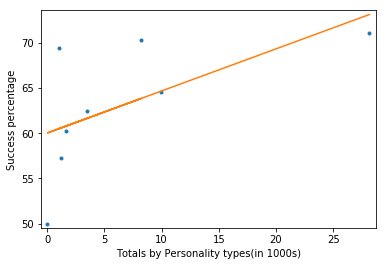

In [264]:
# Check whether the "personality type" has a positive correlation with "Success Indicator"

# Bring all the personality types as a single column in the Data frame.
def identify_personality(x):
    if x['indigenous_ind'] == 'Y':
        return "indigenous_ind"
    elif x['ex_offender_ind'] == 'Y':
        return "ex_offender_ind"
    elif "Y" in x['nesb_ind']:
        return "nesb_ind"
    elif x['refugee_ind'] == 'Y':
        return "refugee_ind"
    elif x['disability_ind'] == 'Y':
        return "disability_ind"
    elif x['homeless_ind'] == 'Y':
        return "homeless_ind"
    elif x['sole_parent_ind'] == 'Y':
        return "sole_parent_ind"
    else:
        return "NO_DISABLITY"


#we need to find the "Success percentage per community/personality type" and check whether this correlates
# with our target.
main_model['personality_type'] = main_df.apply(lambda row: identify_personality(row),axis=1)


# Aggregate the count of "Successes/personality types"
personality_df = main_model.groupby(['personality_type','successful'], as_index=False).agg({"success_indicator": "sum"})

# Find the Success percentage of each industry
personality_y_df = personality_df[personality_df['successful'] == 'Y']
personality_n_df = personality_df[personality_df['successful'] == 'N']
personality_y_df.columns = ['personality_type','successful_y','success_count_y']
personality_n_df.columns = ['personality_type','successful_n','success_count_n']

per_result = pd.merge(personality_y_df, personality_n_df, on='personality_type')
per_result['total'] = per_result.success_count_n + per_result.success_count_y
per_result['success_percent'] = (( per_result.success_count_y / per_result.total ) * 100)

y_percent = np.array(per_result.success_percent)
x_total    = (np.array(per_result.total / 1000))

# Plot the Success percentage per industry by total.
_ = plt.plot(x_total, y_percent, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Totals by Personality types(in 1000s)')
_ = plt.ylabel('Success percentage')

a,b = coefs = poly.polyfit(x_total, y_percent, 1)
ffit = poly.polyval(x_total, coefs)
plt.plot(x_total, ffit)
print(coefs[0],coefs[1])

# Print the results to the screen
print('slope =', a, 'Success percentage by Personality types')
print('intercept =', b, 'Totals per Personality(in 1000s)')
plt.show()

In [268]:
# It appears that the personality types play an important role in determining the success in Business.
# so, we can add the personality types to the list of other positively "correlated indicators"
#(determined by coorelation matrix)
# Note that we have added "Industry type" for grouping purposes only.
main_final = main_model[['sv_sat_overall','sv_sat_mentor','sv_sat_bus_train','sv_month','sv_hours_work',
                         'personality_type']]
print(main_final.describe())
print(main_final.info())

# We will perform the Statistical inferences and Build Machine learning models in subsequent Python books.

       sv_sat_overall  sv_sat_mentor  sv_sat_bus_train      sv_month  \
count    10408.000000   10593.000000      10700.000000  11147.000000   
mean         3.877786       3.864628          4.081682      6.606262   
std          1.305337       1.325153          1.177991      3.435323   
min          1.000000       1.000000          1.000000      1.000000   
25%          4.000000       4.000000          4.000000      4.000000   
50%          4.000000       4.000000          4.000000      6.000000   
75%          5.000000       5.000000          5.000000     10.000000   
max          5.000000       5.000000          5.000000     12.000000   

       sv_hours_work  
count    8102.000000  
mean       35.280449  
std        21.909007  
min         0.000000  
25%        20.000000  
50%        35.000000  
75%        45.000000  
max       120.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53646 entries, 0 to 53645
Data columns (total 6 columns):
sv_sat_overall      10408 non-null f